# Step-0 :Download And Extract Data from STL-10 Dataset

In [1]:
from __future__ import print_function

import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
import urllib.request as urllib 

try:
    from imageio import imsave
except:
    from scipy.misc import imsave


# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

def read_labels(path_to_labels):
    
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    
    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)

        images = np.reshape(everything, (-1, 3, 96, 96))

        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    image = np.reshape(image, (3, 96, 96))
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)
        os.remove(filepath)

def save_images(images, labels, dir):
    i=0
    print("Saving images to disk")
    for image in images:
        label = labels[i]
        directory = dir + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i= i+1
        if i == 10000:
          break


def save_unlabelled_images(images, dir):
    print("Saving images to disk")
    i = 0
    for image in images:
        directory = dir 
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
        if i == 25000:
          break


## Download Data And Extract Training Data

In [2]:
download_and_extract()

In [3]:
def extract_data(DATA_PATH,LABEL_PATH = None, dir  = './img/' ):
  with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

  images = read_all_images(DATA_PATH)
  print(images.shape)
  
  if LABEL_PATH:
    labels = read_labels(LABEL_PATH)
    print(labels.shape)
    save_images(images, labels, dir)
  else :
    save_unlabelled_images(images,dir)



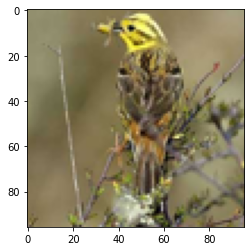

Streaming output truncated to the last 5000 lines.
./img/2/0
./img/6/1
./img/2/2
./img/7/3
./img/4/4
./img/10/5
./img/8/6
./img/5/7
./img/6/8
./img/9/9
./img/1/10
./img/7/11
./img/1/12
./img/9/13
./img/8/14
./img/7/15
./img/5/16
./img/7/17
./img/3/18
./img/3/19
./img/2/20
./img/2/21
./img/7/22
./img/3/23
./img/2/24
./img/9/25
./img/6/26
./img/2/27
./img/6/28
./img/6/29
./img/1/30
./img/1/31
./img/1/32
./img/2/33
./img/4/34
./img/7/35
./img/8/36
./img/3/37
./img/2/38
./img/4/39
./img/2/40
./img/7/41
./img/2/42
./img/4/43
./img/8/44
./img/5/45
./img/4/46
./img/1/47
./img/7/48
./img/8/49
./img/7/50
./img/6/51
./img/9/52
./img/1/53
./img/7/54
./img/2/55
./img/4/56
./img/7/57
./img/9/58
./img/3/59
./img/3/60
./img/10/61
./img/10/62
./img/6/63
./img/2/64
./img/8/65
./img/9/66
./img/8/67
./img/9/68
./img/9/69
./img/10/70
./img/1/71
./img/6/72
./img/1/73
./img/3/74
./img/6/75
./img/6/76
./img/8/77
./img/9/78
./img/10/79
./img/6/80
./img/1/81
./img/9/82
./img/4/83
./img/3/84
./img/10/85
./img/7

In [4]:
DATA_PATH = './data/stl10_binary/train_X.bin'

LABEL_PATH = './data/stl10_binary/train_y.bin'

extract_data(DATA_PATH,LABEL_PATH, dir  = './img/' )

## Extract Testing Data

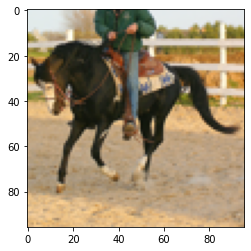

Streaming output truncated to the last 5000 lines.
./testimg/5/3000
./testimg/5/3001
./testimg/10/3002
./testimg/5/3003
./testimg/6/3004
./testimg/1/3005
./testimg/7/3006
./testimg/3/3007
./testimg/6/3008
./testimg/9/3009
./testimg/8/3010
./testimg/7/3011
./testimg/5/3012
./testimg/2/3013
./testimg/10/3014
./testimg/9/3015
./testimg/3/3016
./testimg/5/3017
./testimg/3/3018
./testimg/10/3019
./testimg/3/3020
./testimg/8/3021
./testimg/1/3022
./testimg/4/3023
./testimg/3/3024
./testimg/1/3025
./testimg/7/3026
./testimg/6/3027
./testimg/4/3028
./testimg/8/3029
./testimg/9/3030
./testimg/5/3031
./testimg/8/3032
./testimg/2/3033
./testimg/5/3034
./testimg/2/3035
./testimg/3/3036
./testimg/8/3037
./testimg/2/3038
./testimg/4/3039
./testimg/8/3040
./testimg/3/3041
./testimg/5/3042
./testimg/5/3043
./testimg/8/3044
./testimg/8/3045
./testimg/7/3046
./testimg/1/3047
./testimg/3/3048
./testimg/4/3049
./testimg/2/3050
./testimg/1/3051
./testimg/3/3052
./testimg/2/3053
./testimg/1/3054
./testimg/7

In [5]:
DATA_PATH = './data/stl10_binary/test_X.bin'
LABEL_PATH = './data/stl10_binary/test_y.bin'

# Testing Data
extract_data(DATA_PATH,LABEL_PATH, dir  = './testimg/' )


## Extract Unlabelled Data

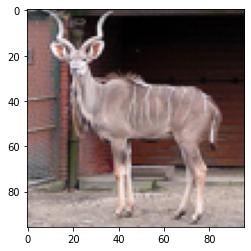

Streaming output truncated to the last 5000 lines.
./unlabelledimg/20000
./unlabelledimg/20001
./unlabelledimg/20002
./unlabelledimg/20003
./unlabelledimg/20004
./unlabelledimg/20005
./unlabelledimg/20006
./unlabelledimg/20007
./unlabelledimg/20008
./unlabelledimg/20009
./unlabelledimg/20010
./unlabelledimg/20011
./unlabelledimg/20012
./unlabelledimg/20013
./unlabelledimg/20014
./unlabelledimg/20015
./unlabelledimg/20016
./unlabelledimg/20017
./unlabelledimg/20018
./unlabelledimg/20019
./unlabelledimg/20020
./unlabelledimg/20021
./unlabelledimg/20022
./unlabelledimg/20023
./unlabelledimg/20024
./unlabelledimg/20025
./unlabelledimg/20026
./unlabelledimg/20027
./unlabelledimg/20028
./unlabelledimg/20029
./unlabelledimg/20030
./unlabelledimg/20031
./unlabelledimg/20032
./unlabelledimg/20033
./unlabelledimg/20034
./unlabelledimg/20035
./unlabelledimg/20036
./unlabelledimg/20037
./unlabelledimg/20038
./unlabelledimg/20039
./unlabelledimg/20040
./unlabelledimg/20041
./unlabelledimg/20042
./u

In [6]:
DATA_PATH = './data/stl10_binary/unlabeled_X.bin'
LABEL_PATH = None
# Unlabelled Data
extract_data(DATA_PATH,LABEL_PATH, dir  = './unlabelledimg/' )

## Load Unlabelled Images For Unsupervised Learning

In [7]:
import cv2
import numpy as np

def load_images(image_dir,directory_root):
  images = []
  for image in image_dir:
     image_file = f"{directory_root}/{image}"
     img = cv2.imread(image_file)
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
     images.append(gray)
  return images

def cvt_image(images):
  return np.array(images, dtype=np.float32)



directory_root = "unlabelledimg"
image_dir = os.listdir(directory_root)[:2]

images = load_images(image_dir,directory_root)


### Test Loaded Image 

(-0.5, 95.5, 95.5, -0.5)

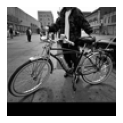

In [8]:
plt.figure(figsize=[2,2])
plt.imshow(images[0],cmap='gray'); plt.axis("off")

# Step-1 : Image Standardization

In [9]:
def image_standardize(dataset):
  
  mean = np.mean(dataset, axis=(0,1,2), keepdims=True)
  std = np.std(dataset, axis=(0,1,2), keepdims=True)
  standardized_images_out = (dataset - mean) / std
  
  return standardized_images_out


# Step-2 : Apply PCA for Whitening, Dimensionality Reduction and Visualization

In [10]:
from scipy.linalg import svd

def find_covariance(image_data):
  m = image_data.shape[0]
  cov = (1/m) * np.matmul(image_data.T,image_data)
  print("---Found Covaraince---")
  return cov

def compute_eigen(cov):
  u, s, _ = svd(cov)
  print("---Found EigenVectors---")
  return (u,s)


In [11]:
# Preprocess data
def preprocess_data(image_dir, dir_root):
  temp_images = load_images(image_dir,dir_root)
  images = cvt_image(temp_images)
  print(images.shape)
  image_list_standardize = image_standardize(images)
  m = image_list_standardize.shape[0]
  image_data =  image_list_standardize.reshape(m,-1)
  return image_data  

def compute_pca(n_components,X,u):
  print("---Computing PCA---")
  return np.matmul(u[:,:n_components].T,X.T)
  


  

In [12]:
directory_root = "unlabelledimg"
image_dir = os.listdir(directory_root)

image_data = preprocess_data(image_dir, directory_root)

  

(25000, 96, 96)


## PCA For Visualization

In [13]:
cov = find_covariance(image_data)

(u,s) = compute_eigen(cov)

k=2 

X = compute_pca(k,image_data,u)


---Found Covaraince---
---Found EigenVectors---
---Computed PCA---


In [14]:
# Calculate Variance
def calculate_var(s,k):
  var = (s[:k].sum()/s.sum()) * 100
  return var

print("The total variance retained for k=2 is : {}".format(calculate_var(s,k)))



The total variance retained for k=2 is : 31.700387597084045


(2, 25000)


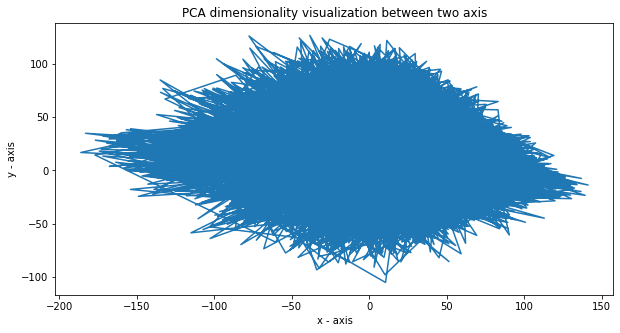

In [15]:
import matplotlib.pyplot as plt 
  
# # function to show the plot 
# plt.show()
print(X.shape)
# x axis values 
x = X[0,:] 
# corresponding y axis values 
y = X[1,:] 

plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(x,y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('PCA dimensionality visualization between two axis') 
  
# function to show the plot 
plt.show()


## Apply PCA Using Scikit-Learn For Visualization

(25000, 2)


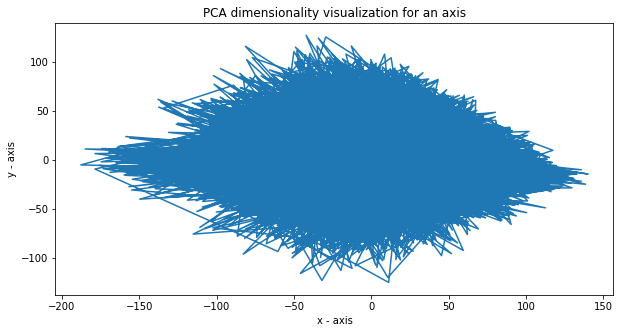

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(image_data)

X = pca.transform(image_data)

print(X.shape)
# x axis values 
x = X[:,0] * -1
# corresponding y axis values 
y = X[:,1] 

# Create figure
plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('PCA dimensionality visualization for an axis') 
  
# function to show the plot 
plt.show()



In [17]:
# Delete variables for mamory space
del X
del pca
del cov

## Mean Squared Error For Different Dimensionality Reduction And Reconstruction.

Here, we will use different dimensions (32,64,256,512,1028,2046,4098) and calculate mean squared error after reconstruction.

In [18]:
def reconstruct_pca(X,u,k):
  return np.matmul(u[:,:k],X).T

def calculate_mse(y,y_hat):
  diff_sq = (y - y_hat)**2
  mse = diff_sq.sum().sum()
  return mse


In [19]:
dims = [32,64,256,512,1028,2046,4098]
mean_squared_errors = []
variance = []

for k in dims:
  
  X = compute_pca(k,image_data,u)
  y_hat = reconstruct_pca(X,u,k)
  
  # Calculate mean squared error for each k_dim
  mse = calculate_mse(image_data,y_hat)
  
  # Calculate variance for each k-dim
  var = calculate_var(s,k)
  
  # Create a list for each for plotting 
  mean_squared_errors.append(mse)
  variance.append(var)

  print("The variance retained for dim {} is {}".format(k,var))
  print("The mean squared error for dim {} is {} \n".format(k,mse))


---Computed PCA---
The variance retained for dim 32 is 72.4001944065094
The mean squared error for dim 32 is 63592376.0 

---Computed PCA---
The variance retained for dim 64 is 78.58808636665344
The mean squared error for dim 64 is 49335356.0 

---Computed PCA---
The variance retained for dim 256 is 88.33763599395752
The mean squared error for dim 256 is 26872738.0 

---Computed PCA---
The variance retained for dim 512 is 92.05699563026428
The mean squared error for dim 512 is 18303424.0 

---Computed PCA---
The variance retained for dim 1028 is 95.14608383178711
The mean squared error for dim 1028 is 11187255.0 

---Computed PCA---
The variance retained for dim 2046 is 97.56304025650024
The mean squared error for dim 2046 is 5620425.5 

---Computed PCA---
The variance retained for dim 4098 is 99.23264980316162
The mean squared error for dim 4098 is 1771823.25 



Plotting mse with different dimensions

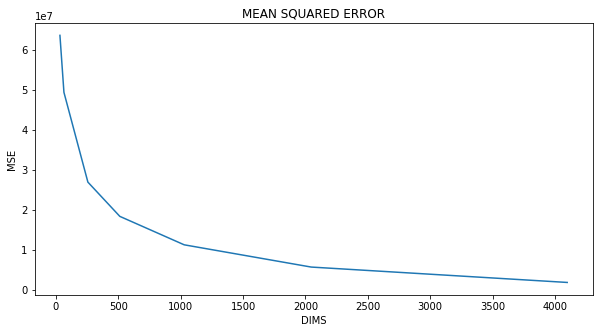

In [20]:
# Create figure
plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(dims, mean_squared_errors) 
  
# naming the x axis 
plt.xlabel('DIMS') 
# naming the y axis 
plt.ylabel('MSE') 
  
# giving a title to my graph 
plt.title('MEAN SQUARED ERROR') 
  
# function to show the plot 
plt.show()


Plotting variance with different dimensions

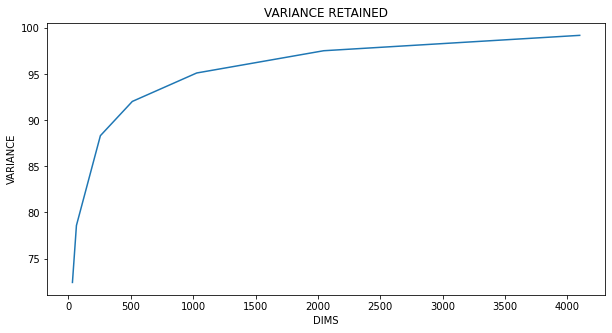

In [21]:
# Create figure
plt.figure(figsize=[10,5])

# plotting the points  
plt.plot(dims, variance) 
  
# naming the x axis 
plt.xlabel('DIMS') 
# naming the y axis 
plt.ylabel('VARIANCE') 
  
# giving a title to my graph 
plt.title('VARIANCE RETAINED') 
  
# function to show the plot 
plt.show()


## PCA For Whitening Data

We will now select k which retains atleast 99% of variance for us.

In [22]:
def apply_pca(n_components,image_data):
  cov = find_covariance(image_data)
  (u,s) = computer_eigen(cov)
  out =  np.matmul(u[:,:n_components.T],image_data.T)
  return out 

In [23]:
from sklearn.decomposition import PCA
def find_best_k(s,var_ret):
  min_k = 0
  for k in range(1,s.shape[0]):
    var = calculate_var(s,k)
    if var >= var_ret:
      print("The variance retained is:{}".format(var))
      return k

k = find_best_k(s,99)
print("The value of k where atleast 99% variance is retained should be k = {}".format(k))

# Apply PCA
image_reduced = compute_pca(k,image_data,u)

# Apply PCA using Scikit
# pca = PCA(n_components=0.99)
# image_reduced = pca.fit_transform(image_data)  
  


The variance retained is:99.00018572807312
The value of k where atleast 99% variance is retained should be k = 3621
---Computed PCA---


In [25]:
# Delete image_data for RAM space
del image_data


NameError: ignored

# Step-3 : Apply GMM for mapping data from k features to 10 features

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

X_train = image_reduced.T

n_components = 10

del image_reduced


In [27]:
print("The shape of our training set is:{}".format(X_train.shape))

The shape of our training set is:(25000, 3621)


## Using Scikit-Learn To Apply GMM 

In [28]:
from sklearn import mixture
import itertools
from scipy import linalg


gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full',random_state=0)
# gmm.fit(image_reduced_sk)
gmm.fit(X_train)


GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [29]:
# del X_train

# Step-4 : Evaluation

## Load Training Images And Set Label Mapping

In [30]:
# Use Scikit Learn for prediction
def apply_gmm_with_sk(images, clf = gmm, selected_k=k,u_reduce=u):
  
  whitened_data = compute_pca(selected_k,images,u_reduce).T
  prediction = clf.predict(whitened_data)
  return prediction




In [31]:
import statistics
from scipy import stats as s
root_dir = 'img'
dir = os.listdir(root_dir)
l= []
map_dict = {}
for i in dir:
  directory_root = f"{root_dir}/{i}"
  im_dir = os.listdir(directory_root)
  images = preprocess_data(im_dir,directory_root)
  prediction = apply_gmm_with_sk(images)
  label = int(s.mode(prediction)[0])#statistics.mode(prediction) 
  map_dict[i] = label


print("The mapping for our labels will be:\n{}".format(map_dict))  
  

(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
(500, 96, 96)
---Computed PCA---
The mapping for our labels will be:
{'4': 2, '9': 5, '10': 6, '1': 4, '2': 4, '3': 1, '7': 2, '6': 2, '5': 2, '8': 2}


## Evaluation Using Test Sets

In [35]:
# Load Test Sets
def load_test_images(root_dir="testimg"):
  dir = os.listdir(root_dir)
  images = []
  labels = []
  for i in dir:
    directory_root = f"{root_dir}/{i}"
    im_dir = os.listdir(directory_root)
    for image in im_dir:
     image_file = f"{root_dir}/{i}/{image}"
     img = cv2.imread(image_file)
     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
     images.append(gray)
     labels.append(i)
  return (images,labels)  

# Process test images
def image_process(images):
  images = cvt_image(images)
  image_list_standardize = image_standardize(images)
  m = image_list_standardize.shape[0]
  image_data =  image_list_standardize.reshape(m,-1)
  return image_data 

# Map labels
def map_labels(labels,map_dict=map_dict):
  mapped_label = []
  for i in labels:
    mapped_label.append(map_dict[i])
  return mapped_label  



In [36]:
images,labels = load_test_images()
processed_images = image_process(images)
Y_value = np.array(map_labels(labels))
Y_prediction = apply_gmm_with_sk(processed_images)
print(Y_prediction)

---Computed PCA---
[7 8 8 ... 2 4 4]


## Calculating Accuracy

In [37]:
positives = 0
for i in range(Y_prediction.shape[0]):
  if Y_prediction[i] == Y_value[i]:
    positives = positives+1
acc = (positives/Y_prediction.shape[0]) * 100

print("The total accuracy achieved is {}%".format(acc))

The total accuracy achieved is 19.45%


# Step-5 Using Our Implementation To Apply GMM

In [38]:
def multivariateGaussian(mu,sigma,X):
  X_norm = X - mu.reshape(-1,1).T
  N = X.shape[1]
  temp1 = (2*np.pi)**(-N/2)  * (np.linalg.det(sigma) ** (-1/2))
  temp2 = np.dot(X_norm,np.linalg.inv(sigma))
  G = temp1 * np.sum(np.exp(-0.5*np.multiply(X_norm,temp2)),axis=1)
  return G


In [39]:
from scipy.stats import multivariate_normal

def apply_gmm(X_train,n_components,n_loop=100):
  
  m = X_train.shape[0]
  n_dim = X_train.shape[1]
  
  # Initialize parameters
  
  mu_shape = (n_components, n_dim)
  mu = np.random.normal(size=mu_shape)

  sigma = np.ones((n_components,n_dim,n_dim)) 
  # sigma = [np.identity(n_dim) for _ in range(n_components)] 
  # sigma = np.array(sigma,dtype="float32") + 1e+7


  pi = np.random.randint(1,100, size=(n_components,1))
  pi = pi/pi.sum()

  neg_log = []


  # Compute Gaussian distribution
    
  for loop in range(n_loop):
    
    # Compute Gaussian distribution
    multi_var = [ multivariate_normal(mu[i],sigma[i],allow_singular=True) for i in range(n_components)]
    g_val = np.array([multi_var[i].pdf(X_train) for i in range(n_components)])
    print("G_val:{}".format(g_val))

    # Negative log-likelihood
    weighted_g_val = np.array([pi[i]*g_val[i] for i in range(n_components)])
    
    weighted_g_val_log = np.log(weighted_g_val.sum(axis=0)).sum()
    print("weighted_g_val_log:{}".format(weighted_g_val_log))
    neg_log.append(-weighted_g_val_log)
    
    # Compute Responsibilities
    weighted_sum = weighted_g_val.sum(axis=0)
    r = np.divide(weighted_g_val, weighted_sum)
    # print("r:{}".format(r))
    
    dotted = np.dot(r,X_train)
    denom = dotted.sum(axis=1)
    denom = np.reshape(denom,(-1,denom.shape[0])).T
    
    # Update Means
    x_2 = X_train**2
    mu = np.divide(np.dot(r,x_2),denom)
    
    # Update pi
    pi = ((1/n_dim)*denom)
    
    # Update Covariance Matrices
    for c in range(n_components):
            mu_c = mu[c, :]
            n_c = denom[c]

            outer = np.zeros((n_dim, n_dim)).astype(float)
            for i in range(m):
                wic = r[c, i]
                xi = X_train[i, :]
                outer += wic * np.outer(xi - mu_c, xi - mu_c)

            outer = outer / n_c if n_c > 0 else outer
            sigma[c] = outer
    
    mu = np.reshape(mu, mu_shape)
    sigma = np.reshape(np.array(sigma), sigma_shape)
    
    # Means and covs of the sampled and mixed Gaussians
    if loop == n_loop - 1:
        print("mu:", mu)
        print('sigma:', sigma)
        print('pi', pi)
    
    return mu,sigma,pi    

def gmm_predict(mu,sigma,pi,X,n_components):
  
  rv = [multivariate_normal(mu[i], sigma[i]) for i in range(n_components)]

  # Negative log-likelihood
  nll = []
  weighted_g_val = np.array([pi[i]*rv[i].pdf(XX) for i in range(n_components)])
  weighted_g_val = weighted_g_val.sum(axis=0)
  eps = 1e-200
  weighted_g_val[ weighted_g_val < eps ] = eps
  weighted_g_val = -np.log(weighted_g_val)

  Z = weighted_g_val.reshape(X.shape)
  return Z

In [ ]:
mu,sigma,pi = apply_gmm(X_train,n_components,n_loop=100)

G_val:[[0.00662843 0.006629   0.00662824 ... 0.00662824 0.00662548 0.00662842]
 [0.00662973 0.00662965 0.00662972 ... 0.00662422 0.00662886 0.00662973]
 [0.00662947 0.00662968 0.00662938 ... 0.00662629 0.00662769 0.00662947]
 ...
 [0.0066227  0.00662412 0.00662225 ... 0.00662964 0.00661696 0.00662268]
 [0.00662669 0.00662759 0.00662639 ... 0.00662935 0.00662261 0.00662667]
 [0.00662863 0.00662914 0.00662845 ... 0.00662801 0.00662584 0.00662862]]
weighted_g_val_log:-125414.92560574978


In [ ]:
# Use our implementation for prediction
def apply_gmm_on_dataset(images, u_reduce, n_components=10, mu= mu, pi=pi, sigma=sigma):
  whitened_data = compute_pca(n_components,images,u_reduce)
  prediction = gmm_predict(mu,sigma,pi,whitened_data,n_components)
  return prediction




NameError: ignored

In [41]:
K = 10 # number of clusters
m = X_train.shape[0]
n_dim = X_train.shape[1]
  
means = np.zeros((K,n_dim))
covs = np.zeros((K,n_dim,n_dim))
for k in range(K):
    means[k] = np.random.normal(size=(n_dim,))
    covs[k] = np.eye(n_dim)

weights = np.ones((K,1))/K

data = X_train
# data = z_code_g
# data = z_code_b

#EDIT THIS FUNCTION
NLL = [] # log-likelihood of the GMM
gmm_nll = 0
for k in range(K):
    gmm_nll += weights[k]*multivariate_normal.pdf(mean=means[k,:], cov=covs[k,:,:], x=data)
    print(gmm_nll)
    
NLL += [-np.sum(np.log(gmm_nll))]


for k in range(K):
    rv = multivariate_normal(means[k,:], covs[k,:,:])
    

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


In [ ]:
 N = 25000

#EDIT THIS FUNCTION
r = np.zeros((K,N)) # will store the responsibilities

for em_iter in range(1):    
    means_old = means.copy()
    
    # E-step: update responsibilities
    for k in range(K):
        r[k] = weights[k]*multivariate_normal.pdf(mean=means[k,:].ravel(), cov=covs[k,:,:], x=data)  
        
    r = r/np.sum(r, axis=0) 
        
    # M-step
    N_k = np.sum(r, axis=1)

    for k in range(K): 
        # update means
        means[k] = np.sum(r[k]*data.T, axis=1)/N_k[k]
        
        # update covariances
        diff = data.T - means[k:k+1].T
        _tmp = np.sqrt(r[k:k+1])*diff
        covs[k] = np.inner(_tmp, _tmp)/N_k[k]
        
    # weights
    weights = N_k/N 
    
    # log-likelihood
    gmm_nll = 0
    for k in range(K):
        gmm_nll += weights[k]*multivariate_normal.pdf(mean=means[k,:].ravel(), cov=covs[k,:,:], x=data.T)
    NLL += [-np.sum(np.log(gmm_nll))]
    
    for k in range(K):
        rv = multivariate_normal(means[k,:], covs[k])
    
    if la.norm(NLL[em_iter+1]-NLL[em_iter]) < 1e-6:
        print("Converged after iteration ", em_iter+1)
        break
   
gmm = 0
for k in range(K):
    mix_comp = multivariate_normal(means[k,:].ravel(), covs[k,:,:])
    gmm += weights[k]*mix_comp.pdf(pos)
